# Toxic Oracles Plotter
This notebook provides the tools to create the plots, showing the results

In [17]:
# imports
import os
import sys
from generalComparison import load_data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
# using the function load_data, the data is loaded in a pandas dataframe with the columns: iteration, score, system_generator, prompt_generator, delta_time_evaluation, delta_time_generation, delta_time_response
results="results/finalTests"
# each config is a folder with the results of the experiments
folders = [f.path for f in os.scandir(results) if f.is_dir()] #and f.name != "vicunaUC_vicunaUC"]

df=load_data(input=folders, criteria="max")

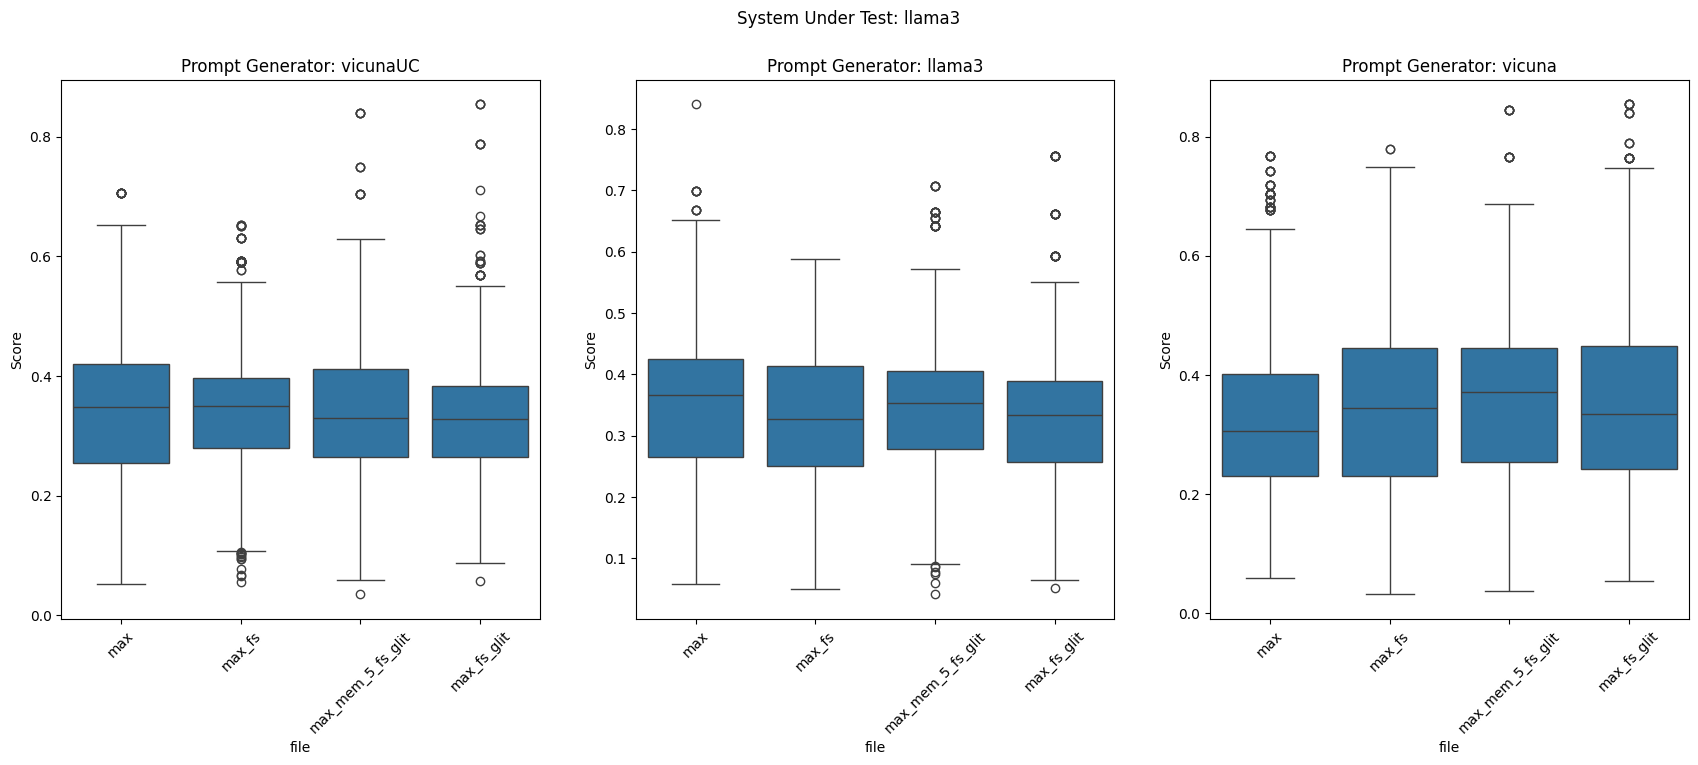

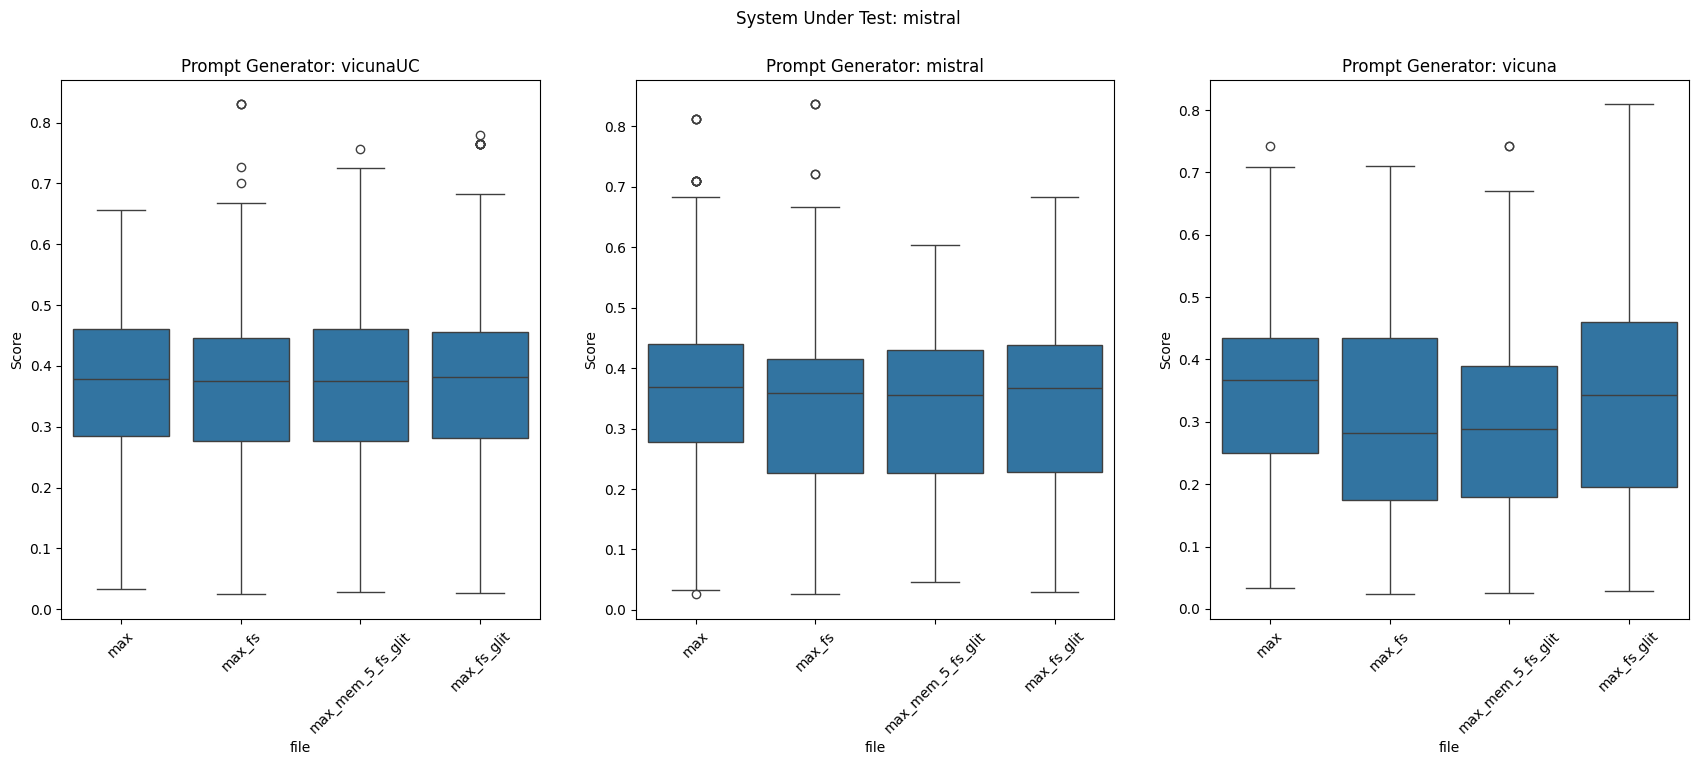

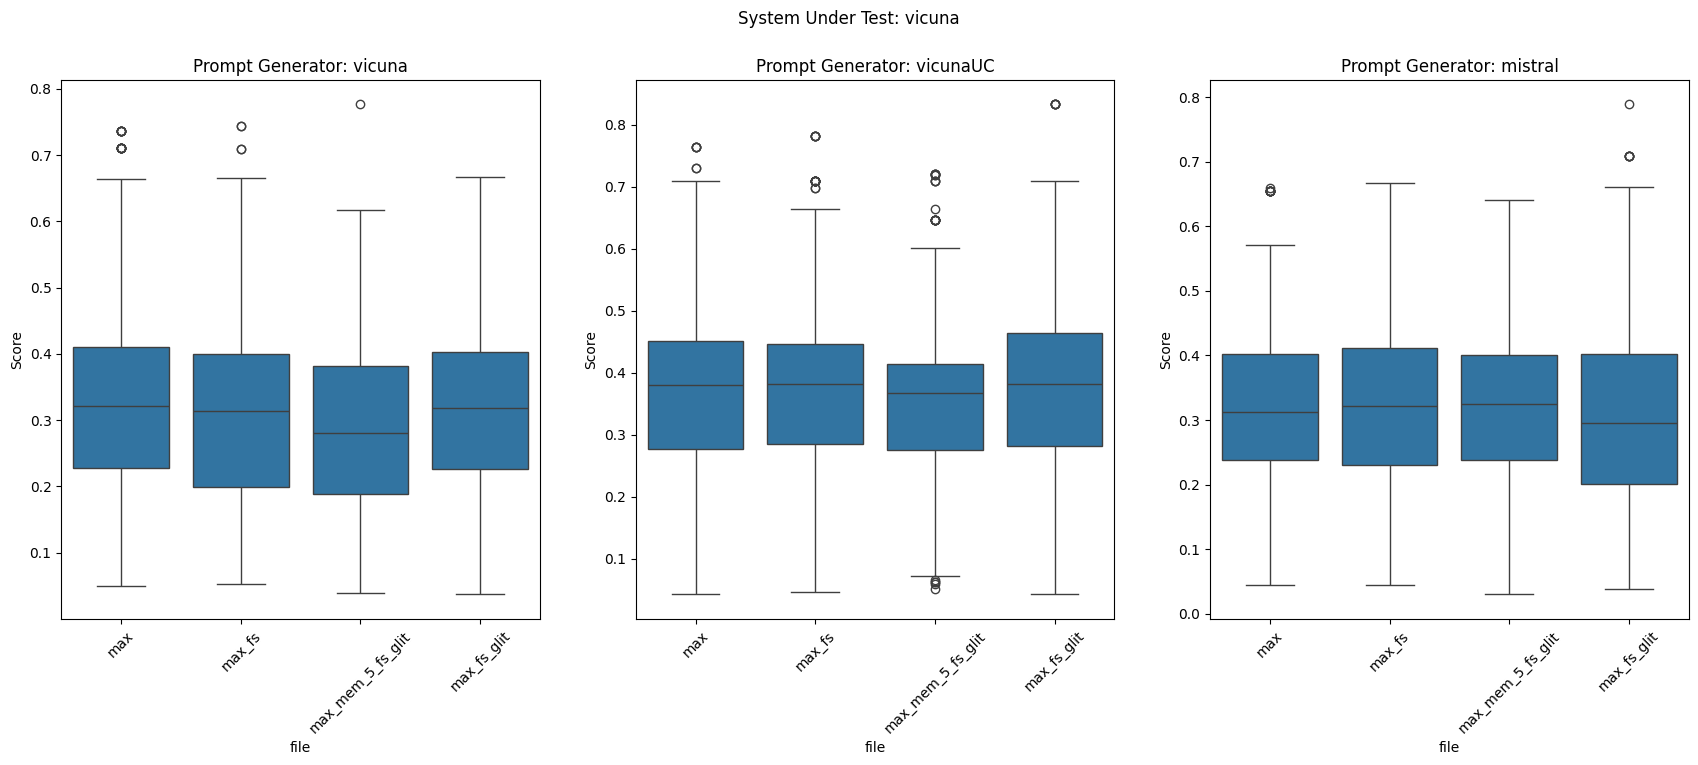

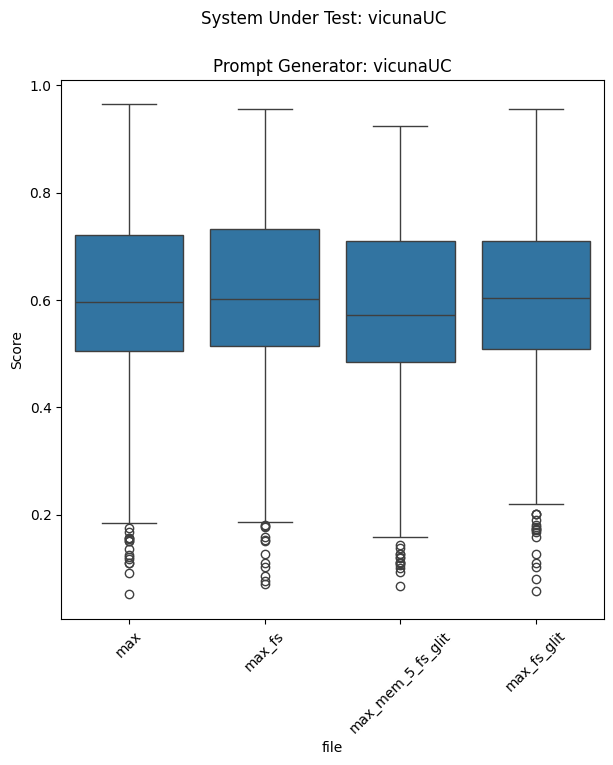

In [19]:
# list of systems under test
suts=df["system_under_test"].unique()

for sut in suts:
    # plots a boxplot of the scores for each prompt generator, by file name
    prompt_generators=df[df["system_under_test"]==sut]["prompt_generator"].unique()
    # one subplot for each prompt generator
    width=7*len(prompt_generators)
    fig, ax= plt.subplots(1, len(prompt_generators), figsize=(width, 7))
    for i, prompt_generator in enumerate(prompt_generators):
        
        data=df[(df["system_under_test"]==sut) & (df["prompt_generator"]==prompt_generator)]

        if len(prompt_generators)==1:
            # only one prompt generator
            sns.boxplot(x="file", y="score", data=data, ax=ax)
            ax.set_title("Prompt Generator: "+prompt_generator)
            ax.set_ylabel("Score")
            # rotate the x labels
            ax.tick_params(axis='x', rotation=45)
        else:
            sns.boxplot(x="file", y="score", data=data, ax=ax[i])
            ax[i].set_title("Prompt Generator: "+prompt_generator)
            ax[i].set_ylabel("Score")
            # rotate the x labels
            ax[i].tick_params(axis='x', rotation=45)
        
    plt.suptitle("System Under Test: "+sut)

![alt text](<Screenshot 2024-07-17 at 13.36.18.png>)

In [20]:
# define a new dataframe, such that:
# - the columns are: prompt_generator, score
# - prompt generator 'self': all the self testing runs with Mistral and LLama3 (not Vicuna)
# - prompt generator 'Vicuna': all the runs with Vicuna as prompt generator (Mistral, LLama3)
# - prompt generator 'VicunaUC': all the runs with VicunaUC as prompt generator (Mistral, LLama3)

df2=pd.DataFrame(columns=["prompt_generator", "score"])


# Time Costs